In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
import plotly.graph_objects as go

In [2]:
df = yf.download("AAPL", start='2021-01-01', end='2022-01-20')

v = df['Volume'].values
tp = (df['Low'] + df['Close'] + df['High']).div(3).values
df = df.assign(vwap=(tp * v).cumsum() / v.cumsum())

[*********************100%***********************]  1 of 1 completed


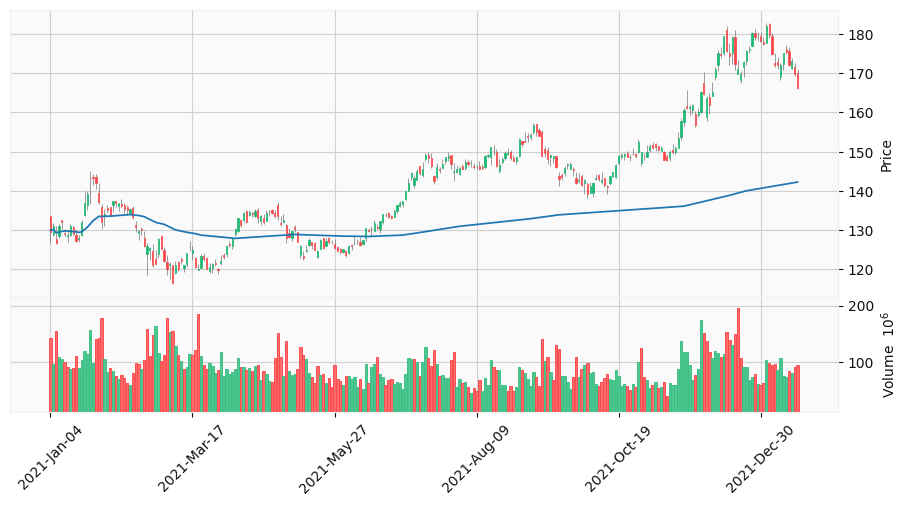

In [3]:
# using mplfinance
adp = mpf.make_addplot(df['vwap'], type='line')
mpf.plot(df, figratio=(8,4), type='candle', addplot=adp, volume=True, style='yahoo')

In [4]:
# using 
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],name='AAPL')])

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['vwap'],
    mode='lines',
    name='vwap', 
    line=dict(color='royalblue',width=2)
))

fig.update_layout(
    height=600
)
fig.show()